# 웹 크롤링 확장 :Selenium

- BeautifulSoup는 이미 완성된 HTLM만 분석한다.  
- 하지만 많은 웹 사이트는 JavaScript를 통해 페이지가 동적으로 생성된다!  
    - 화면 상에는 보이지만 HTML에는 보이지 않음!

Selenium
- 동적으로 웹페이지를 제어하기 위한 라이브러리
    - 브라우저 제어
    - 클릭, 입력, 스크롤, 드래그와 같은 실제 사용자 행동과 동일한 동작 수행
    - JS로 동적으로 생성되는 페이지 처리 가능

In [ ]:
'''
1. 라이브러리 설치하기
2. 라이브러리 불러오기 및 웹 드라이버 불러오기

driver? = Selenium과 브라우저 사이의 통신을 담당하는 중간 제어 프로그램. 실제 브라우저를 조작하게 하는 역할
'''
# pip install selenium

from selenium import webdriver
driver = webdriver.Chrome()

In [ ]:
'''
옵션 : 화면이 꺼지지 않고 계속 유지하기
'''
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By


options = Options()
options.add_experimental_option("detach", True)

driver = webdriver.Chrome(options=options)

url = "https://naver.com"
driver.get(url)

In [ ]:
'''
검색 창에 키보드 입력하기

find_element()함수로 id 속성이 "query"인 요소 객체 반환

send_keys()함수를 바탕으로 특정 키 입력
'''
query = driver.find_element(By.ID, "query")
query.send_keys("데이터 엔지니어링")

In [ ]:
'''
time 모듈을 활용해서 브라우저 로딩 등 작업에 대한 대기 시간 추가
'''
import time
time.sleep(2)

In [ ]:
'''
버튼 클릭 : 해당 요소를 가져와 클릭 수행
'''
search_btn = driver.find_element(By.CSS_SELECTOR, "#search-btn")
search_btn.click()

In [ ]:
'''
버튼 대신 : 엔터키 입력
'''
from selenium.webdriver.common.keys import Keys

query.send_keys(Keys.ENTER)

Selenium의 요소 검색
- find_element() 함수를 활용하여 요소 찾기
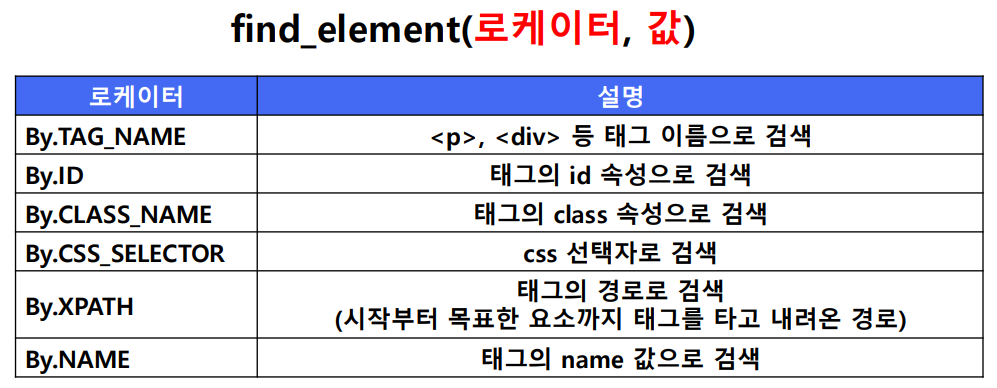

XPATH? 특정 요소를 찾기 위한 경로 표현식
- ```query = dirver.find_element(By.XPATH, "")```
- 태그에 class 나 id가 없어서 찾기 어려운 경우 유용  [요소 우클릭 > Copy Xpath]


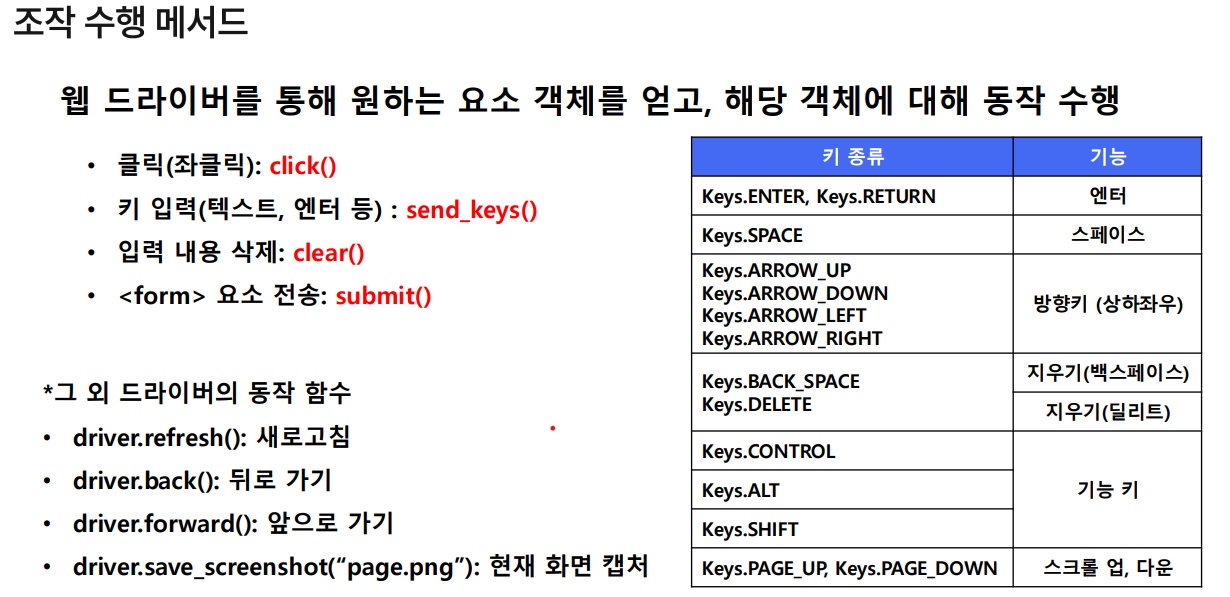

### 명시적 대기 : WebDriverWait

- time.sleep()은 파이썬 프로세스를 일시 정지 하는 것 (=무조건 멈춰라)
    - WebdriverWait는 최대 대기시간 내에서 조건이 만족되면 즉시 다음 단계로 진행
    - 페이지 로딩 속도가 느리거나, JS 동적 로딩 시 유용

In [ ]:
'''
명시적 대기 : WebDriverWait

- wait 객체 생성
- wait 객체의 unitl()메서드
    - 인자로 넣는 조건이 10초 안에 충족되면 즉 다음 코드로 넘어가고
    - 10초 동안 조건이 만족되지 않으면 TimeoutException 발생
'''

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

wait = WebDriverWait(driver, 10)

element = wait.until(
    EC.presence_of_element_located((By.CSS_SELECTOR, ".my-element"))
)

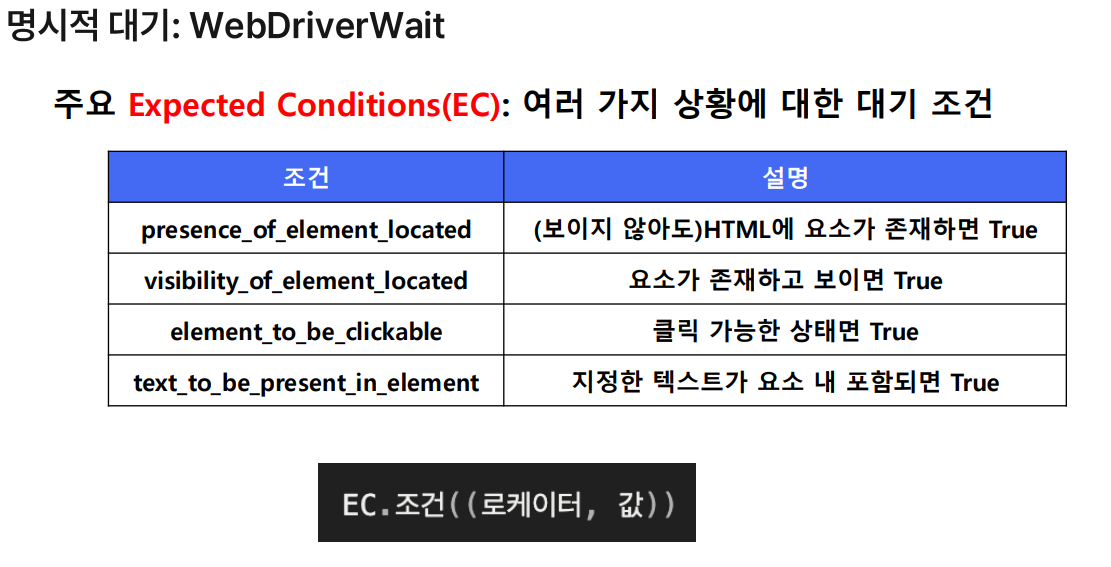

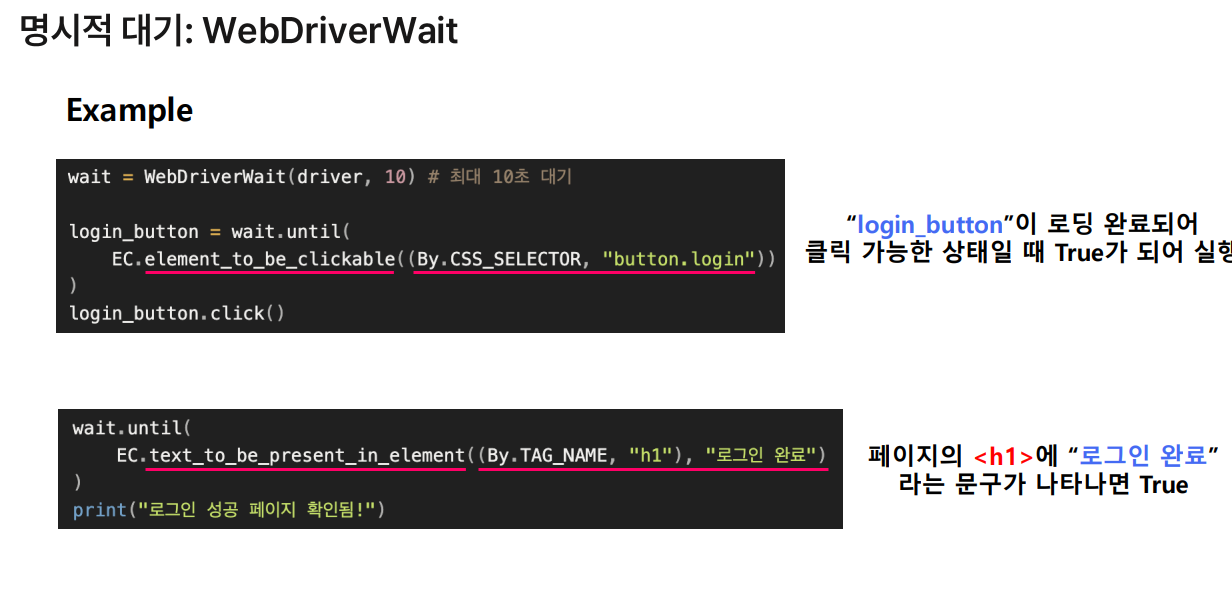

### 무한 스크롤

- 지속적인 스크롤을 통해 아이템이 로딩되어 갱신하는 구조
- ```dirver.execute_script(SCRIPT)```
    - 웹 브라우저에 JavaScript를 동적으로 실행

## Selenium + BeautifulSoup 조합

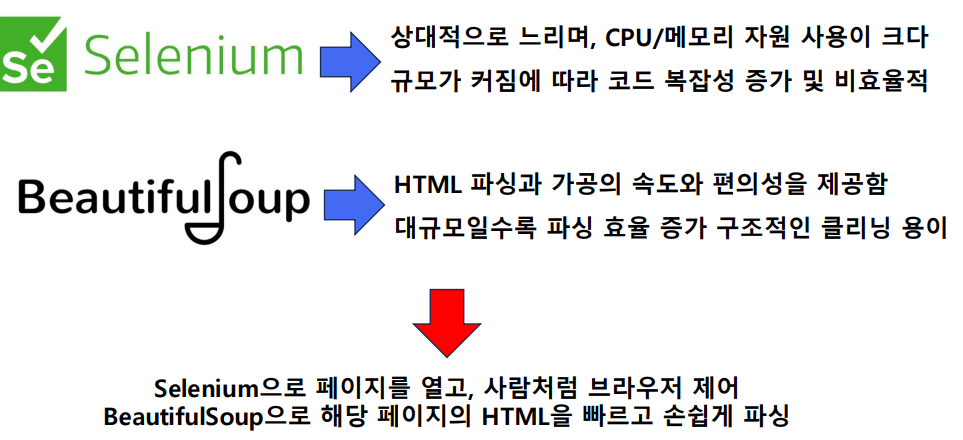

Selenium + BeautifulSoup 예시는 py 파일에서 확인